<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-joseovalle_A01150742/blob/main/Reduccion_dimensiones_A01150742.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # Alumno: José Ovalle Alvarado
> # Matrícula: A0150742
> # Materia: Ciencia y Analítica de Datos
> # Profesor: María de la Paz Rico Fernández
> # Fecha: 25/10/2022





# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig

# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("-------Matriz original-------\n")
print(A)

# calcula la eigendescomposición
values, vectors = eig(A)
print("-------Eigen Valores--------\n")
print(values) #D
print("-------Eigen Vectores--------\n")
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print("-------Matriz reconstruida-------\n")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)

#TU CODIGO AQUI-------------------------------------

B =  np.matmul(W, np.matmul( D, Winv))

print(B)
print("-----------------------------")

-------Matriz original-------

[[1 2 3]
 [4 5 6]
 [7 8 9]]
-------Eigen Valores--------

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
-------Eigen Vectores--------

[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


**Para lograr la reconstrucción de la matriz es necesario utilizar la operación np.maltmul y realizar las operaciones de forma estructurada. Primero se multiplica matriz diagonal de los eigen valores por la matriz inversa de los eigen vectores. Posteriormente el resultado obtenido se multiplica por la matriz no inversa de los eigen vectores. Una vez realizadas estas operaciones se puede observar que la matriz obtenida de estas operaciones es igual a a la matriz inicial A.**

In [ ]:
#Matriz 1

# define la matriz
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])

print("-------Matriz original-------\n")
print(A)

# calcula la eigendescomposición
values, vectors = eig(A)
print("-------Eigen Valores--------\n")
print(values) #D
print("-------Eigen Vectores--------\n")
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print("-------Matriz reconstruida-------\n")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)

#TU CODIGO AQUI-------------------------------------

B =  np.matmul(W, np.matmul( D, Winv))

print(B)
print("-----------------------------")
print("La matriz 1 no tiene eigen vectores / valores ")

-------Matriz original-------

[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-------Eigen Valores--------

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
-------Eigen Vectores--------

[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------

[[ 3.00000000e+00+1.10502020e-16j  3.33066907e-16-1.07634758e-16j
   2.00000000e+00-4.53208949e-17j]
 [ 3.00000000e+00-1.85363355e-16j  9.52464076e-16+8.65552564e-17j
  -2.00000000e+00+2.50908285e-17j]
 [ 1.11022302e-16-3.68871782e-17j  1.00000000e+00-5.41055264e-17j
   1.00000000e+00+9.14850482e-17j]]
-----------------------------
La matriz 1 no tiene eigen vectores / valores 


In [ ]:
#Matriz 2


# define la matriz
A = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])

print("-------Matriz original-------\n")
print(A)

# calcula la eigendescomposición
values, vectors = eig(A)
print("-------Eigen Valores--------\n")
print(values) #D
print("-------Eigen Vectores--------\n")
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print("-------Matriz reconstruida-------\n")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)

#TU CODIGO AQUI-------------------------------------

B =  np.matmul(W, np.matmul( D, Winv))

print(B)
print("-----------------------------")

-------Matriz original-------

[[1 3 8]
 [2 0 0]
 [0 0 1]]
-------Eigen Valores--------

[ 3. -2.  1.]
-------Eigen Vectores--------

[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------

[[1.0000000e+00 3.0000000e+00 8.0000000e+00]
 [2.0000000e+00 0.0000000e+00 8.8817842e-16]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]
-----------------------------


In [ ]:
#Matriz 3

# define la matriz
A = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])

print("-------Matriz original-------\n")
print(A)

# calcula la eigendescomposición
values, vectors = eig(A)
print("-------Eigen Valores--------\n")
print(values) #D
print("-------Eigen Vectores--------\n")
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print("-------Matriz reconstruida-------\n")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)

#TU CODIGO AQUI-------------------------------------

B =  np.matmul(W, np.matmul( D, Winv))

print(B)
print("-----------------------------")

-------Matriz original-------

[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------Eigen Valores--------

[ 6.89167094 -0.214175   -0.67749594]
-------Eigen Vectores--------

[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------

[[ 5.00000000e+00  4.00000000e+00 -1.44328993e-15]
 [ 1.00000000e+00 -1.11022302e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
-----------------------------


**De las tres matrices analizadas, sólo la matriz 2 y 3 se puede descomponer en eigen vectores y eigen valores. La primer matriz tiene raíces negativas por lo cual no existen eigen valores. Esto sugieres que no hay vectores que mantengan sus características iniciales después de alguna o varias transformaciones.**

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


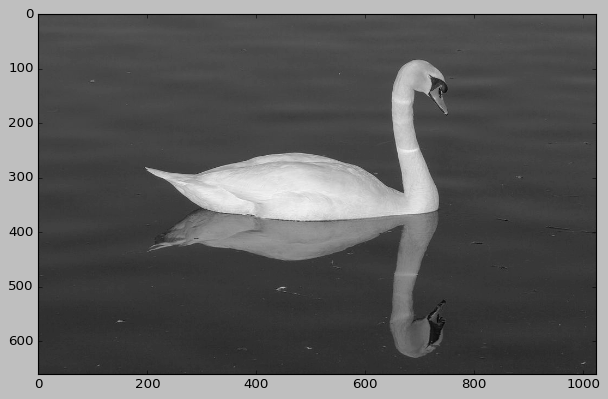

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FAAC42D6A10>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

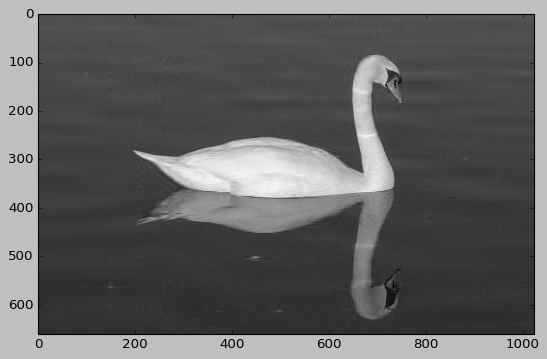

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[212. 215. 217. ... 127. 120. 120.]


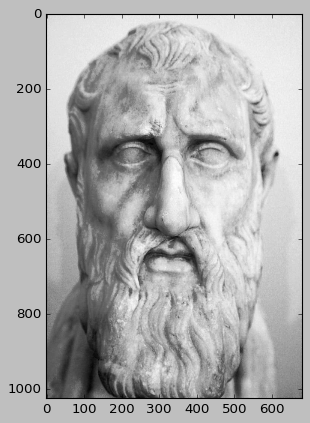

<PIL.Image.Image image mode=LA size=682x1023 at 0x7FAAC426B910>


In [ ]:
#imagen 1

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/10/Zenon_de_Citio.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(1023, 682)

In [ ]:
U.shape

(1023, 1023)

In [ ]:
V.shape

(682, 682)

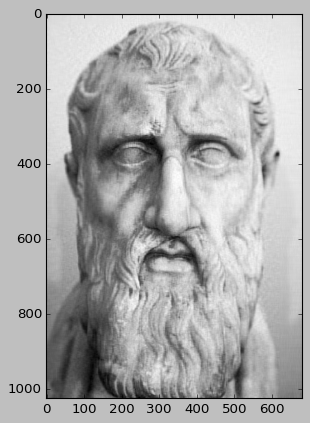

Felicidades la imagen está comprimida


In [ ]:
nvalue =70
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

**Comentario imágen 1: Para esta imagen n = 70 muestra una calidad aceptable. De utilzar n = 1023, n = 70 es un valor que conserva una calidad signifcativa de la imágen.**

[113. 112. 111. ... 120. 120. 120.]


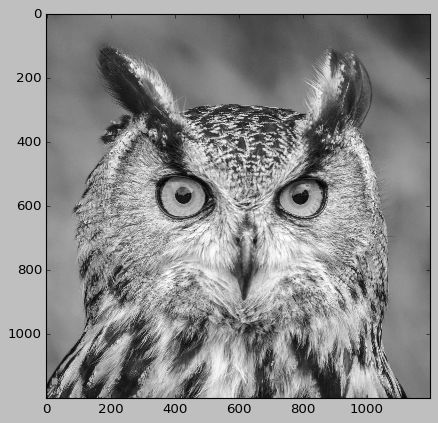

<PIL.Image.Image image mode=LA size=1200x1200 at 0x7FAAC438B410>


In [ ]:
#imagen 2

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/05/simbolismo-buho.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(1200, 1200)

In [ ]:
U.shape

(1200, 1200)

In [ ]:
V.shape

(1200, 1200)

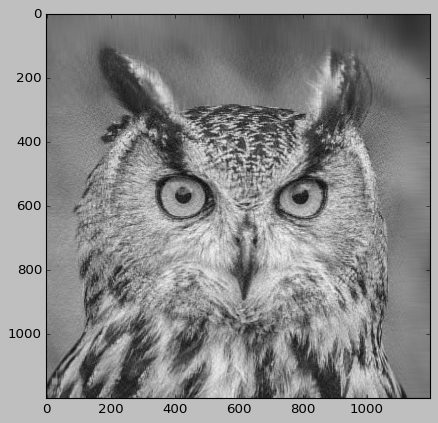

Felicidades la imagen está comprimida


In [ ]:
nvalue =100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

**Comentario imágen 2: Para esta imagen n = 100 muestra una calidad aceptable. De utilzar n = 1200, n = 100 es un valor que conserva una calidad signifcativa de la imágen.**

[ 53.  57.  60. ... 227. 226. 226.]


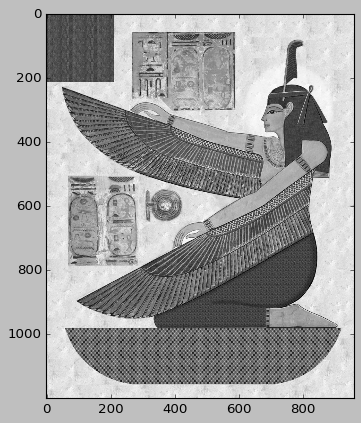

<PIL.Image.Image image mode=LA size=960x1200 at 0x7FAAC46B2F10>


In [ ]:
#imagen 3
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/04/Goddess_Maat.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(1200, 960)

In [ ]:
U.shape

(1200, 1200)

In [ ]:
V.shape

(960, 960)

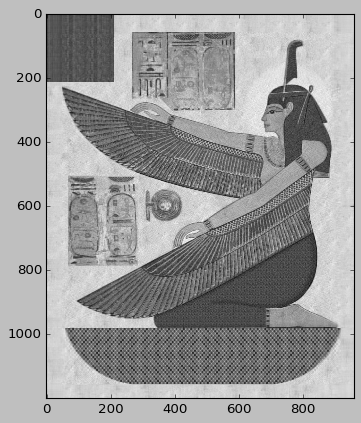

Felicidades la imagen está comprimida


In [ ]:
nvalue =150
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

**Comentario imágen 3: Para esta imagen n = 150 muestra una calidad aceptable. De utilzar n = 1200, n = 150 es un valor que conserva una calidad signifcativa de la imágen.**

**Comentarios generales sobre la compresión de imágenes:**

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

**La operación matemática que reconstruye las imágenes es una operación matricial reconstimg = U * D * V**


**Las 3 matrices son simplificadas sólo tomando n filas o columnas y haciendo el producto de ellas para comprimir la calidad de la imágen.**

In [ ]:
print(np.matrix(U[:,:nvalue]).shape)
print(np.diag(D[:nvalue]).shape)
print(np.matrix(V[:nvalue,:]).shape)
reconstimg.shape

(1023, 70)
(70, 70)
(70, 682)


(1023, 682)

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [1]:
# iris data set ejemplo

# importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')


In [3]:
# generar dataset

iris = datasets.load_iris()
X = iris.data
y = iris.target

# aplicar z scor transformación

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# aplicar PCA
pca = PCA(n_components= 2)
X_new = pca.fit_transform(X) # esta parte proyecta la data inicial en los vectores del componente principal

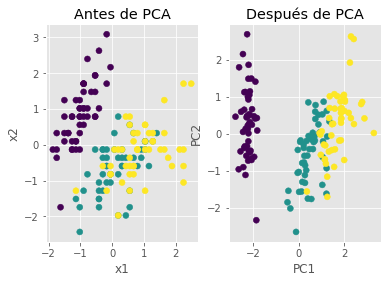

In [11]:
# plot de la data

fig, axes = plt.subplots(1,2)

axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes de PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Después de PCA')
plt.show()

In [12]:
# variación explicada por dos componentes

print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


**Teoría de Eigen vectores / valores**

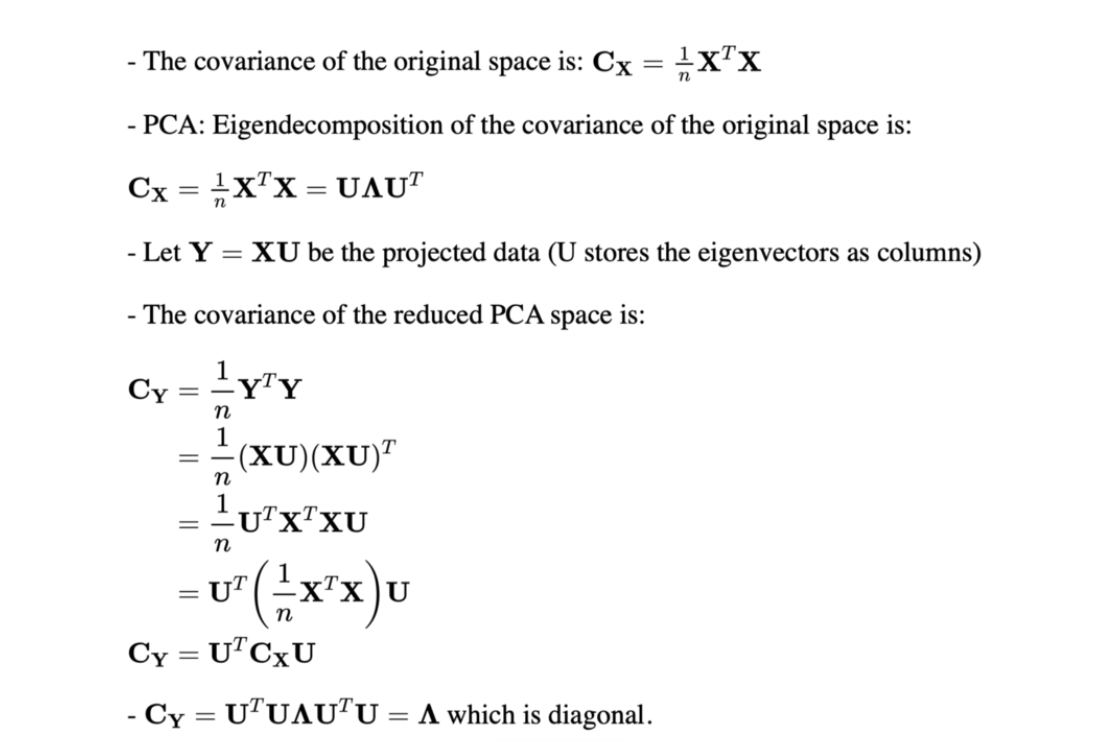

In [15]:
# proof of eigen vector and values with covariance matrix

X_new # datos generados por los 2 componentes principales
X_new.shape


(150, 2)

In [16]:
X_new.T.shape # transpuesta de valores generdos por los 2 componentes principales

(2, 150)

In [18]:
np.cov(X_new.T) # matriz de covarianza a la matriz de arriba, los valores de la diagonal principal deben de coincidir con los eigen valores arrojados por la función

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [19]:
pca.explained_variance_

# los valores mostrados aquí son los eigen valores

array([2.93808505, 0.9201649 ])

In [20]:
# Importancia de features

print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [21]:
# 1er componente principal
print(abs( pca.components_ )[0])

# las características 1,3,4 (.52,.58 y .56) son las características principales del componente 1

[0.52106591 0.26934744 0.5804131  0.56485654]


In [22]:
# 2d0 componente principal
print(abs( pca.components_ )[1])

# la característica 2 es la segunda característica principal del componente 2

[0.37741762 0.92329566 0.02449161 0.06694199]


In [23]:
# "biplot"

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

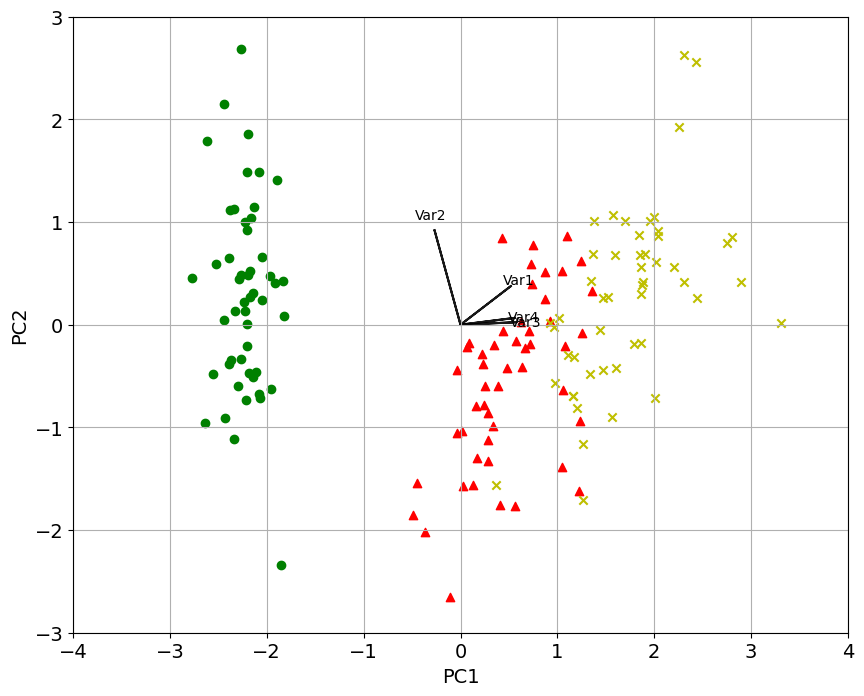

In [24]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

**¿Qué es feature importance y para que nos sirve?**

Feature importance se refiere a la relevancia que tienen las variables dentro de un análisis de reducción de dimensionalidad. 
Las variables más importantes son las que producen la mayor cantidad de variación dentro del análisis. Si existen por ejemplo 100 variables que cubren el 100% de la variación, pero 10 de éstas
Explican el 80%, 90% de la variación, se puede inferir que el resto de las variables no contribuyen a una explicación significativa de un fenómeno estudiado y que las relaciones o correlaciones con la variable a predecir se explicar mejor con las variables principales y que pueden estar distribuidas en diferentes componentes o vectores principales. Son estos vectores los que generar la variación principal el problema y su ortogonalidad nos ayuda a capturar la mayor cantidad de información posible, pero con un manejo más adecuado y menos rebuscado de los datos.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Dentro de este ejercicio se identificaron 2 componentes principales, los cuales están compuestos por 4 variables. El componente principal 1 es el que explicar la mayor cantidad de variación y las variables que definen este componente principal son las variables 1,3,4, es decir, el componente que absorbe la mayor cantidad del problema considera que las variables principales a estudiar son la 1,3 y 4, mientras que el componente principal 2 es mayormente explicado por la variable 2. Esta variable 2 capta menor variación que el resto de las variables por lo que pasa a “Segundo término” y dependiendo de la variación buscada a analizar puede o no ser descartado para reducir la dimensionalidad del problema.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**
Esta metodología puede ser utilizada cuando se analizan problemas multicausales y multivariables, y es muy útil cuando hay demasiadas relaciones a analizar. El análisis de componentes principales ayudar a definir las principales variables de estudio y su relación con la variable a predecir.


Extensión: 200 palabras o más entre todas las respuestas. Sigue el formato pregunta-respuesta.